# What's in these colab file


1.   Mounting TextExtraction and Cleanup file for using it's functions
2.   Divided Data into Train Test and Val Category
3.   Applied Data Augmentation on Training Data and increased it's quantity from 12% to 24,36,48%
4.   Converted Text Data to Vectors using TFIDF Vectorizer
5.   Applied Different model on the Data (RandomForest , LinearSVM .. etc)


## Mounting & Inmporting Libraries

In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report,balanced_accuracy_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("../py")
#from utils import *

from sklearn import linear_model, utils, svm
from sklearn.utils import resample
from imblearn.under_sampling import ClusterCentroids, EditedNearestNeighbours, RandomUnderSampler, TomekLinks, CondensedNearestNeighbour
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
!cp /content/drive/MyDrive/NLP/TextExtractionCleanUP.py /content

In [4]:
pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 33.5 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=96c4b10da1cbbd936196e6b838db432d46815a8b1f32ea6ecf54d97ded61ac8f
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [26]:
import TextExtractionCleanUP

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Train Test Val SPLIT

In [6]:
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
from sklearn.utils import shuffle
df = pd.read_csv("/content/Final_hate.csv")
df

,Unnamed: 0,Text,label
0,0,RT @MailOnline: The Nazi death gas so horrific...,0
1,1,Carlos Correa had gyalchester as his walkup mu...,0
2,2,"""THE FORCE AWAKENS: A Bad Lip Reading"" (Featur...",0
3,3,RT @HeeeyMonica: Papaya has to be the worst fr...,0
4,4,@Pineaqples @DenialEsports btw I watched where...,0
...,...,...,...
103216,103216,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,0
103217,103217,"you've gone and broke the wrong heart baby, an...",0
103218,103218,young buck wanna eat!!.. dat nigguh like I ain...,0
103219,103219,youu got wild bitches tellin you lies,0


In [7]:
train = df['Text']
test = df['label']

In [8]:
print(train.shape,test.shape)

(103221,) (103221,)


In [10]:
# set aside 20% of train and test data for evaluation
X_train, X_val, y_train, y_val = train_test_split(train, test, test_size=0.2, shuffle = False, random_state = 8)


print("X_train shape: {}".format(X_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_val shape: {}".format(y_val.shape))


print("========================")

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25,random_state= 8) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


X_train shape: (82576,)
X_val shape: (20645,)
y_train shape: (82576,)
y_val shape: (20645,)
X_train shape: (61932,)
y_train shape: (61932,)
X_test shape: (20644,)
y_test shape: (20644,)


In [11]:
y_val.value_counts()

0    19515
1     1130
Name: label, dtype: int64

In [12]:
X_train

69365    @em_zyme @nvidiadeveloper @YahooGames @TwitchS...
22438    Rainy Sunday afternoon working on laptop while...
42853    You're the happiest when you are free to flit ...
8270     i feel so out of it right now. i feel like how...
20197    2 people followed me and one person unfollowed...
                               ...                        
10376    Charlie Lee: Wow! Twitter just did a softfork ...
62426    RT @uberfeminist: #TwitterFeminism tries to ge...
18417    ROLL UP! Just follow me + Retweet &amp; you ca...
25940    Who needs California. Guy with surfboard in Hi...
70083     @ItsOnlyAkram @steveplrose This is #Islamophobia
Name: Text, Length: 61932, dtype: object

In [13]:
y_train

69365    0
22438    0
42853    0
8270     0
20197    0
        ..
10376    0
62426    0
18417    0
25940    0
70083    0
Name: label, Length: 61932, dtype: int64

In [14]:
!pip install transformers
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 18.0 MB/s 
     |████████████████████████████████| 596 kB 36.7 MB/s 
     |████████████████████████████████| 6.6 MB 41.6 MB/s 
     |████████████████████████████████| 101 kB 12.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 33.1 MB/s 


In [15]:
X_train.to_frame()
y_train.to_frame()

,label
69365,0
22438,0
42853,0
8270,0
20197,0
...,...
10376,0
62426,0
18417,0
25940,0


In [16]:
# Just for refrence
trainingData = pd.concat([X_train, y_train], axis=1, join='inner')
trainingData

,Text,label
69365,@em_zyme @nvidiadeveloper @YahooGames @TwitchS...,0
22438,Rainy Sunday afternoon working on laptop while...,0
42853,You're the happiest when you are free to flit ...,0
8270,i feel so out of it right now. i feel like how...,0
20197,2 people followed me and one person unfollowed...,0
...,...,...
10376,Charlie Lee: Wow! Twitter just did a softfork ...,0
62426,RT @uberfeminist: #TwitterFeminism tries to ge...,0
18417,ROLL UP! Just follow me + Retweet &amp; you ca...,0
25940,Who needs California. Guy with surfboard in Hi...,0


In [17]:
x = trainingData.label.value_counts()
x

0    53474
1     8458
Name: label, dtype: int64

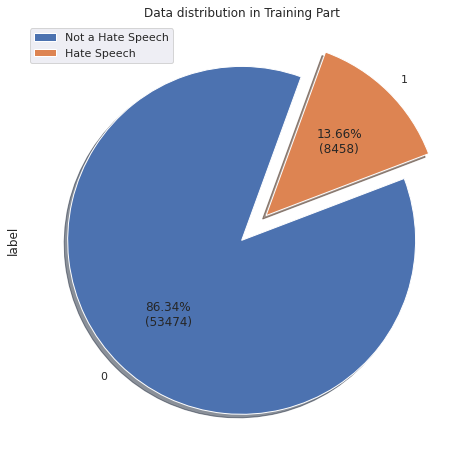

In [19]:
import seaborn as sns
x = trainingData.label.value_counts()
sns.set()
explode = (0, 0.2)
labels = [r'Not a Hate Speech','Hate Speech']
x.plot(kind='pie', title='Data distribution in Training Part', figsize=[8,8],shadow=True, legend=True,
       explode = explode,startangle=70,autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*x.sum()))
plt.legend(labels, loc="best")
plt.show()

## Augmentation

In [ ]:
import nlpaug.augmenter.word.context_word_embs as aug

In [ ]:
sample_text = df[df['label']==1].Text.iloc[100]
sample_text

'I hate when people get up here and tell what happening on a TV show or Movie... Shut yo ass up :face_with_tears_of_joy:'

In [ ]:
augmenter = aug.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

In [ ]:
asSample = augmenter.augment(sample_text)
asSample

'i myself hate when people gotta get invited up here and not tell of what happening on a tv news show or the movie... shut yo ass... up : face _ one with _ tears _ dam of _ joy :'

In [ ]:
for i in range(5):
    print(augmenter.augment(sample_text))

i hate when people all get tied up in here and never tell what happening comes on a tv game show or movie... shut yo your ass up : face _ face with _ happy tears _ of _ happy joy :
i hate when real people just get up here and tell us what keeps happening on a tv show or movie movie... wanna shut down yo ass up : s face _ deep with _ tears _ of _ eternal joy :
but i hate when people will get up here and come tell you what happening happen on a reality tv talk show or movie... shut yo ass fuck up : be face _ with _ tears _ day of _ joy :
i particularly hate that when my people get trapped up here and wanna tell what goes happening on in a fictional tv show or movie... shut yo ass get up : face _ level with _ tears _ of _ joy :
i do hate it when those people get up from here too and tell what s happening on a tv show or movie... shut yo ass up : totally face _ over with _ ugly tears _ of _ joy joy :


In [ ]:
def augmentMyData(df, augmenter, repetitions=1, samples=200):
    augmented_texts = []
    # select only the minority class samples
    spam_df = df[df['label'] == 1].reset_index(drop=True) # removes unecessary index column
    for i in tqdm(np.random.randint(0, len(spam_df), samples)):
        # generating 'n_samples' augmented texts
        for _ in range(repetitions):
            augmented_text = augmenter.augment(str(spam_df['Text'].iloc[i]))
            augmented_texts.append(augmented_text)
    
    data = {
        'label': 1,
        'Text': augmented_texts
    }
    aug_df = pd.DataFrame(data)
    df = shuffle(df.append(aug_df).reset_index(drop=True))
    return df

In [ ]:
# Passing training data for Augmentation
# For final 50%
aug_df = augmentMyData(trainingData, augmenter, samples=50000)

## Already 50% Augmented Data taken.

In [20]:
trainingData = pd.read_csv("/content/BERTContextual_50percHSnew.csv")
trainingData

,Unnamed: 0,Text,label
0,9923,@TChivese @tarirokamuti Where were you born ? ...,0
1,57143,Self care is the best care! :girl::person_gett...,0
2,90545,but and yet he supports a desperate man who is...,1
3,42993,Funny Racist Jokes,0
4,98550,you ever not see even a fox dance with merely ...,1
...,...,...,...
111927,31669,Astrologists n Palmists overwhelmingly predict...,0
111928,40352,@mutaSawwif And if you are going to follow a p...,0
111929,80841,vanilla ice should not have let me kick the ig...,1
111930,85090,# 1 sens,1


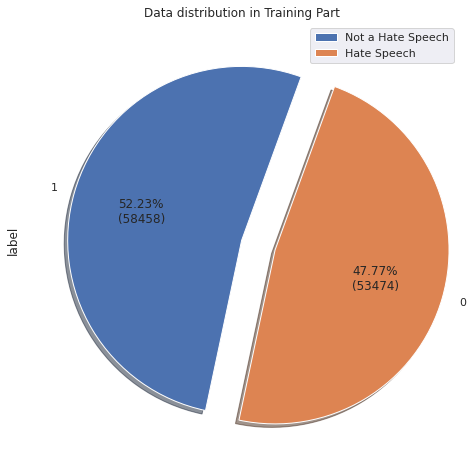

In [21]:
import seaborn as sns
x = trainingData.label.value_counts()
sns.set()
explode = (0, 0.2)
labels = [r'Not a Hate Speech','Hate Speech']
x.plot(kind='pie', title='Data distribution in Training Part', figsize=[8,8],shadow=True, legend=True,
       explode = explode,startangle=70,autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*x.sum()))
plt.legend(labels, loc="best")
plt.show()

## Training Part(PreProcess)

In [22]:
aug_df = trainingData

In [27]:
# Expansion of short form words
aug_df['Text'] = aug_df['Text'].apply(lambda x: TextExtractionCleanUP.preprocess_english(x))

In [28]:
TextExtractionCleanUP.preprocessing_method(aug_df,'Text')

,Unnamed: 0,Text,label
0,9923,born dont know probably born bred town,0
1,57143,self care best care girlperson_getting_massage...,0
2,90545,yet supports desperate man utterly w scruples ...,1
3,42993,funny racist jokes,0
4,98550,ever see even fox dance merely fucking goddamn...,1
...,...,...,...
111927,31669,astrologists n palmists overwhelmingly predict...,0
111928,40352,going follow prophet approved collateral damag...,0
111929,80841,vanilla ice let kick iggy apparently knows way...,1
111930,85090,sens,1


In [29]:
TextExtractionCleanUP.spellCheck(aug_df,'Text')

In [30]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [31]:
aug_df['Text'] = aug_df['Text'].apply(TextExtractionCleanUP.lemmatize_Tokenize_text)

In [32]:
aug_df

,Unnamed: 0,Text,label
0,9923,"[born, dont, know, probably, born, bred, town]",0
1,57143,"[self, care, best, care, girlperson_getting_ma...",0
2,90545,"[yet, support, desperate, man, utterly, w, scr...",1
3,42993,"[funny, racist, joke]",0
4,98550,"[ever, see, even, fox, dance, merely, fucking,...",1
...,...,...,...
111927,31669,"[astrologist, n, palmist, overwhelmingly, pred...",0
111928,40352,"[going, follow, prophet, approved, collateral,...",0
111929,80841,"[vanilla, ice, let, kick, iggy, apparently, kn...",1
111930,85090,[sen],1


In [33]:
aug_df['Text2'] = aug_df.Text.apply(lambda x: str(x)[1:-1]) 
aug_df

,Unnamed: 0,Text,label,Text2
0,9923,"[born, dont, know, probably, born, bred, town]",0,"'born', 'dont', 'know', 'probably', 'born', 'b..."
1,57143,"[self, care, best, care, girlperson_getting_ma...",0,"'self', 'care', 'best', 'care', 'girlperson_ge..."
2,90545,"[yet, support, desperate, man, utterly, w, scr...",1,"'yet', 'support', 'desperate', 'man', 'utterly..."
3,42993,"[funny, racist, joke]",0,"'funny', 'racist', 'joke'"
4,98550,"[ever, see, even, fox, dance, merely, fucking,...",1,"'ever', 'see', 'even', 'fox', 'dance', 'merely..."
...,...,...,...,...
111927,31669,"[astrologist, n, palmist, overwhelmingly, pred...",0,"'astrologist', 'n', 'palmist', 'overwhelmingly..."
111928,40352,"[going, follow, prophet, approved, collateral,...",0,"'going', 'follow', 'prophet', 'approved', 'col..."
111929,80841,"[vanilla, ice, let, kick, iggy, apparently, kn...",1,"'vanilla', 'ice', 'let', 'kick', 'iggy', 'appa..."
111930,85090,[sen],1,'sen'


In [34]:
X_train = aug_df['Text2']
y_train = aug_df['label']

In [35]:
# # set aside 20% of train and test data for evaluation
# X_train, X_val, y_train, y_val = train_test_split(train, test, test_size=0.2, shuffle = True, random_state = 8)


# print("X_train shape: {}".format(X_train.shape))
# print("X_val shape: {}".format(X_val.shape))
# print("y_train shape: {}".format(y_train.shape))
# print("y_val shape: {}".format(y_val.shape))


# print("========================")

# # Use the same function above for the validation set
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))



X_train shape: (111932,)
y_train shape: (111932,)
X_test shape: (20644,)
y_test shape: (20644,)


##Testing Part (PreProcess)

In [36]:
# Now pre processing testing data
testingData = pd.concat([X_test, y_test], axis=1, join='inner')
testingData

,Text,label
55485,NaN,1
39710,Thanks for chatting with me while I did my mak...,0
48143,"@BullCityVA I feel like Cooper is caught in ""j...",0
33436,"Music, once admitted to the soul, becomes a so...",0
12138,It's as if you're stepping out of the shadows ...,0
...,...,...
27424,Is WWE's Paige pregnant? Sex tape scandal star...,0
7803,THIS. I hate complaining about money but I ref...,0
22782,@TrendsLagos SEE VIDEO MAKING BY @patrickeli...,0
27136,Also @Bradley_Wonfor you should've been there man,0


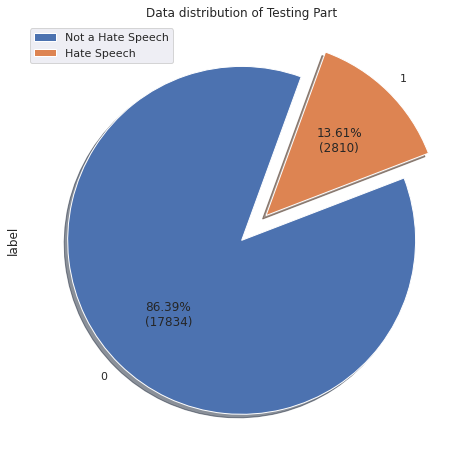

In [37]:
x = testingData.label.value_counts()
sns.set()
explode = (0, 0.2)
labels = [r'Not a Hate Speech','Hate Speech']
x.plot(kind='pie', title='Data distribution of Testing Part', figsize=[8,8],shadow=True, legend=True,
       explode = explode,startangle=70,autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*x.sum()))
plt.legend(labels, loc="best")
plt.show()

In [38]:
# Expansion of short form words
testingData['Text'] = testingData['Text'].apply(lambda x: TextExtractionCleanUP.preprocess_english(x))
TextExtractionCleanUP.preprocessing_method(testingData,'Text')
# SpellCheck
TextExtractionCleanUP.spellCheck(testingData,'Text')
# Lemmetize and tokenize
testingData['Text'] = testingData['Text'].apply(TextExtractionCleanUP.lemmatize_Tokenize_text)
testingData['Text2'] = testingData.Text.apply(lambda x: str(x)[1:-1]) 
testingData

,Text,label,Text2
55485,[nan],1,'nan'
39710,"[thanks, chatting, makeup, guy, totally, made,...",0,"'thanks', 'chatting', 'makeup', 'guy', 'totall..."
48143,"[feel, like, cooper, caught, cannot, win, phas...",0,"'feel', 'like', 'cooper', 'caught', 'cannot', ..."
33436,"[music, admitted, soul, becomes, sort, spirit,...",0,"'music', 'admitted', 'soul', 'becomes', 'sort'..."
12138,"[stepping, shadow, lig, vireo]",0,"'stepping', 'shadow', 'lig', 'vireo'"
...,...,...,...
27424,"[wwe, page, pregnant, sex, tape, scandal, star...",0,"'wwe', 'page', 'pregnant', 'sex', 'tape', 'sca..."
7803,"[hate, complaining, money, refuse, tour, negat...",0,"'hate', 'complaining', 'money', 'refuse', 'tou..."
22782,"[see, video, making, drop, soon, alhaji]",0,"'see', 'video', 'making', 'drop', 'soon', 'alh..."
27136,"[also, man]",0,"'also', 'man'"


In [39]:
X_test = testingData['Text2']
y_test = testingData['label']

In [40]:
X_test

55485                                                'nan'
39710    'thanks', 'chatting', 'makeup', 'guy', 'totall...
48143    'feel', 'like', 'cooper', 'caught', 'cannot', ...
33436    'music', 'admitted', 'soul', 'becomes', 'sort'...
12138                 'stepping', 'shadow', 'lig', 'vireo'
                               ...                        
27424    'wwe', 'page', 'pregnant', 'sex', 'tape', 'sca...
7803     'hate', 'complaining', 'money', 'refuse', 'tou...
22782    'see', 'video', 'making', 'drop', 'soon', 'alh...
27136                                        'also', 'man'
4217     'yes', 'abhiya', 'hug', 'purely', 'magical', '...
Name: Text2, Length: 20644, dtype: object

##MODELING

In [42]:
vec = TfidfVectorizer(
    # lowercase = True,
    # max_df = 0.8,
    # min_df = 5,
    # ngram_range = (1,3),
    # stop_words = "english"
)
tfidf_tr = vec.fit_transform(X_train)
#vec = get_feature_names_out()
tfidf_val = vec.transform(X_test)

In [43]:
print(tfidf_tr.shape,tfidf_val.shape)

(111932, 64048) (20644, 64048)


In [46]:
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, average_precision_score, confusion_matrix, roc_auc_score
from tqdm import tqdm
import re
import nltk
from nltk.stem.porter import PorterStemmer
from textblob import Word
import datetime
import pandas as pd
import requests
import sys
sys.path.append("../py")

import gensim
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def accuracy(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_y_hat))

def f1(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

def precision(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp)

def recall(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    # Find True Positive
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    # Find False Negative
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn)

In [48]:
nb = MultinomialNB().fit(tfidf_tr, y_train)
y_pr_nb_val = nb.predict(tfidf_val)
print(classification_report(y_test, y_pr_nb_val))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84     17834
           1       0.33      0.82      0.47      2810

    accuracy                           0.75     20644
   macro avg       0.65      0.78      0.65     20644
weighted avg       0.88      0.75      0.79     20644



 Random Forest (Tunned)

In [49]:
rf = RandomForestClassifier(n_estimators = 100,
                            criterion = 'gini', 
                            max_depth = None) .fit(tfidf_tr, y_train)
y_pr_rf_val = rf.predict(tfidf_val)
print(classification_report(y_test, y_pr_rf_val))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     17834
           1       0.67      0.71      0.69      2810

    accuracy                           0.91     20644
   macro avg       0.81      0.83      0.82     20644
weighted avg       0.91      0.91      0.91     20644



In [50]:
testingData[40:60]

,Text,label,Text2
65525,"[hope, get, booted, next, round, andre, mr]",0,"'hope', 'get', 'booted', 'next', 'round', 'and..."
58296,"[enough, benzos, goddamn, planet, cope, pot, l...",1,"'enough', 'benzos', 'goddamn', 'planet', 'cope..."
20564,"[thx, public, service, u, people, world, keep,...",0,"'thx', 'public', 'service', 'u', 'people', 'wo..."
8695,"[learn, laravel, blade, blend, smith, like, no...",0,"'learn', 'laravel', 'blade', 'blend', 'smith',..."
62133,"[adviceforyoungfeminists, dont, spoiled, brat,...",0,"'adviceforyoungfeminists', 'dont', 'spoiled', ..."
80699,"[bag, chip, rice, krispies, seed, mummy, pop, ...",0,"'bag', 'chip', 'rice', 'krispies', 'seed', 'mu..."
76611,"[tap, water, phuthadithjaba, may]",0,"'tap', 'water', 'phuthadithjaba', 'may'"
4931,"[meet, hiv, positive, beauty, queen, crowned, ...",0,"'meet', 'hiv', 'positive', 'beauty', 'queen', ..."
15780,"[latest, kotaku, daily, thanks, anime, malupda...",0,"'latest', 'kotaku', 'daily', 'thanks', 'anime'..."
8468,"[submitted, reviewed, modernsky, ar, team, don...",0,"'submitted', 'reviewed', 'modernsky', 'ar', 't..."


In [51]:
print('True:', y_test.values[40:60])
print('False:', y_pr_rf_val[40:60])

True: [0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0]
False: [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]


In [52]:
test = pd.DataFrame(y_pr_rf_val,columns=["Predicted Label"])
test

,Predicted Label
0,0
1,0
2,0
3,0
4,0
...,...
20639,0
20640,1
20641,0
20642,0


In [53]:
testingData1 = testingData
testingData1 = testingData1.reset_index()
testingData1

,index,Text,label,Text2
0,55485,[nan],1,'nan'
1,39710,"[thanks, chatting, makeup, guy, totally, made,...",0,"'thanks', 'chatting', 'makeup', 'guy', 'totall..."
2,48143,"[feel, like, cooper, caught, cannot, win, phas...",0,"'feel', 'like', 'cooper', 'caught', 'cannot', ..."
3,33436,"[music, admitted, soul, becomes, sort, spirit,...",0,"'music', 'admitted', 'soul', 'becomes', 'sort'..."
4,12138,"[stepping, shadow, lig, vireo]",0,"'stepping', 'shadow', 'lig', 'vireo'"
...,...,...,...,...
20639,27424,"[wwe, page, pregnant, sex, tape, scandal, star...",0,"'wwe', 'page', 'pregnant', 'sex', 'tape', 'sca..."
20640,7803,"[hate, complaining, money, refuse, tour, negat...",0,"'hate', 'complaining', 'money', 'refuse', 'tou..."
20641,22782,"[see, video, making, drop, soon, alhaji]",0,"'see', 'video', 'making', 'drop', 'soon', 'alh..."
20642,27136,"[also, man]",0,"'also', 'man'"


In [54]:
final = pd.concat([testingData1, test],axis=1)
final.drop(['index'], axis=1)

,Text,label,Text2,Predicted Label
0,[nan],1,'nan',0
1,"[thanks, chatting, makeup, guy, totally, made,...",0,"'thanks', 'chatting', 'makeup', 'guy', 'totall...",0
2,"[feel, like, cooper, caught, cannot, win, phas...",0,"'feel', 'like', 'cooper', 'caught', 'cannot', ...",0
3,"[music, admitted, soul, becomes, sort, spirit,...",0,"'music', 'admitted', 'soul', 'becomes', 'sort'...",0
4,"[stepping, shadow, lig, vireo]",0,"'stepping', 'shadow', 'lig', 'vireo'",0
...,...,...,...,...
20639,"[wwe, page, pregnant, sex, tape, scandal, star...",0,"'wwe', 'page', 'pregnant', 'sex', 'tape', 'sca...",0
20640,"[hate, complaining, money, refuse, tour, negat...",0,"'hate', 'complaining', 'money', 'refuse', 'tou...",1
20641,"[see, video, making, drop, soon, alhaji]",0,"'see', 'video', 'making', 'drop', 'soon', 'alh...",0
20642,"[also, man]",0,"'also', 'man'",0


Random Forest Hyperparameter Tunnnig

In [ ]:
 # Create the grid parameter:
grid_rf = {'n_estimators': [100],
           'criterion': ['gini'], 
           'max_depth': [None],
           'max_features': [0,2,4,6]} 
          #  'min_samples_split': range(2, 10),
					#  'min_samples_leaf': [1,3,5]}

In [ ]:
# Create the grid:
from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf, grid_rf, cv=3, n_jobs=-1)

In [ ]:
# Fit using grid search:
gs_rf.fit(tfidf_tr, y_train)

In [ ]:
# Print best accuracy and best parameters:
print('Best accuracy: %.3f' % gs_rf.best_score_)
print('\nBest params:\n', gs_rf.best_params_)

XGBoost Tunned

In [55]:
from xgboost import XGBClassifier
xg = XGBClassifier(n_estimators=1500, eta=0.05).fit(tfidf_tr, y_train)
y_pr_xg_val = xg.predict(tfidf_val)
print(classification_report(y_test, y_pr_xg_val))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     17834
           1       0.67      0.69      0.68      2810

    accuracy                           0.91     20644
   macro avg       0.81      0.82      0.81     20644
weighted avg       0.91      0.91      0.91     20644



In [56]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200).fit(tfidf_tr, y_train)
y_pr_abc_val = abc.predict(tfidf_val)
print(classification_report(y_test, y_pr_abc_val))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     17834
           1       0.56      0.69      0.62      2810

    accuracy                           0.88     20644
   macro avg       0.76      0.80      0.78     20644
weighted avg       0.90      0.88      0.89     20644



In [57]:
gbc = GradientBoostingClassifier().fit(tfidf_tr, y_train)
y_pr_gbc_val = gbc.predict(tfidf_val)
print(classification_report(y_test, y_pr_gbc_val))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     17834
           1       0.67      0.63      0.65      2810

    accuracy                           0.91     20644
   macro avg       0.80      0.79      0.80     20644
weighted avg       0.90      0.91      0.91     20644



SVM Tunned

In [58]:
from sklearn import svm
svc = svm.LinearSVC(C=0.028, multi_class="crammer_singer",random_state=42, max_iter=1000).fit(tfidf_tr, y_train)
y_pr_svc_val = svc.predict(tfidf_val)
print(classification_report(y_test, y_pr_svc_val))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     17834
           1       0.63      0.72      0.67      2810

    accuracy                           0.90     20644
   macro avg       0.79      0.83      0.81     20644
weighted avg       0.91      0.90      0.91     20644



In [59]:
#36 -> 42
log = LogisticRegression(random_state=42).fit(tfidf_tr, y_train)
y_pr_log_val = log.predict(tfidf_val)
print(classification_report(y_test, y_pr_log_val))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     17834
           1       0.60      0.72      0.65      2810

    accuracy                           0.90     20644
   macro avg       0.78      0.82      0.80     20644
weighted avg       0.91      0.90      0.90     20644



In [60]:
data = {'Accuracy': [accuracy(y_test, y_pr_nb_val), 
                     accuracy(y_test, y_pr_rf_val), 
                     accuracy(y_test, y_pr_svc_val),
                     accuracy(y_test, y_pr_abc_val),
                     accuracy(y_test, y_pr_gbc_val)],
        'F1 Score': [f1(y_test, y_pr_nb_val), 
                     f1(y_test, y_pr_rf_val), 
                     f1(y_test, y_pr_svc_val),
                     f1(y_test, y_pr_abc_val),
                     f1(y_test, y_pr_gbc_val)],
        'Recall': [recall(y_test, y_pr_nb_val), 
                   recall(y_test, y_pr_rf_val), 
                   recall(y_test, y_pr_svc_val),
                   recall(y_test, y_pr_abc_val),
                   recall(y_test, y_pr_gbc_val)],
        'Precision': [precision(y_test, y_pr_nb_val), 
                      precision(y_test, y_pr_rf_val), 
                      precision(y_test, y_pr_svc_val),
                      precision(y_test, y_pr_abc_val),
                      precision(y_test, y_pr_gbc_val)]}
output = pd.DataFrame(data=data, index = ['Multinomial Naive Bayes', 
                                           'Random Forest',
                                           'Support Vector Machine', 
                                           'AdaBoost Classifier', 
                                           'Gradient Boosting Classifier'])

In [61]:
output

,Accuracy,F1 Score,Recall,Precision
Multinomial Naive Bayes,0.750000,0.471263,0.818505,0.330888
Random Forest,0.912953,0.688508,0.706762,0.671173
Support Vector Machine,0.903604,0.671074,0.722420,0.626543
AdaBoost Classifier,0.884325,0.619624,0.692171,0.560842
Gradient Boosting Classifier,0.906849,0.646962,0.627046,0.668184


In [62]:
data = {'Accuracy': [
                     accuracy(y_test, y_pr_rf_val), 
                     accuracy(y_test, y_pr_svc_val),
                     accuracy(y_test, y_pr_xg_val)],
        'F1 Score': [ 
                     f1(y_test, y_pr_rf_val), 
                     f1(y_test, y_pr_svc_val),
                     f1(y_test, y_pr_xg_val)],
        'Recall': [recall(y_test, y_pr_rf_val), 
                   recall(y_test, y_pr_svc_val),
                   recall(y_test, y_pr_xg_val)],
        'Precision': [precision(y_test, y_pr_rf_val), 
                      precision(y_test, y_pr_svc_val),
                      precision(y_test, y_pr_xg_val)]}
output = pd.DataFrame(data=data, index = ['Random Forest',
                                           'Linear SVC', 
                                           'XGBoost'])

In [63]:
output

,Accuracy,F1 Score,Recall,Precision
Random Forest,0.912953,0.688508,0.706762,0.671173
Linear SVC,0.903604,0.671074,0.722420,0.626543
XGBoost,0.911354,0.680070,0.692171,0.668385


In [ ]:
output.to_csv("OutputWith12to50perAUGBERTnew.csv")
output

,Accuracy,F1 Score,Recall,Precision,ROC-AUC,PR-AUC
Multinomial Naive Bayes,0.750000,0.471263,0.818505,0.330888,0.869232,0.593425
Random Forest,0.914891,0.693849,0.708541,0.679754,0.906924,0.726640
Support Vector Machine,0.894691,0.630774,0.660854,0.603314,0.882511,0.656044
AdaBoost Classifier,0.884325,0.619624,0.692171,0.560842,0.877634,0.625118
Gradient Boosting Classifier,0.906849,0.646962,0.627046,0.668184,0.863726,0.627523


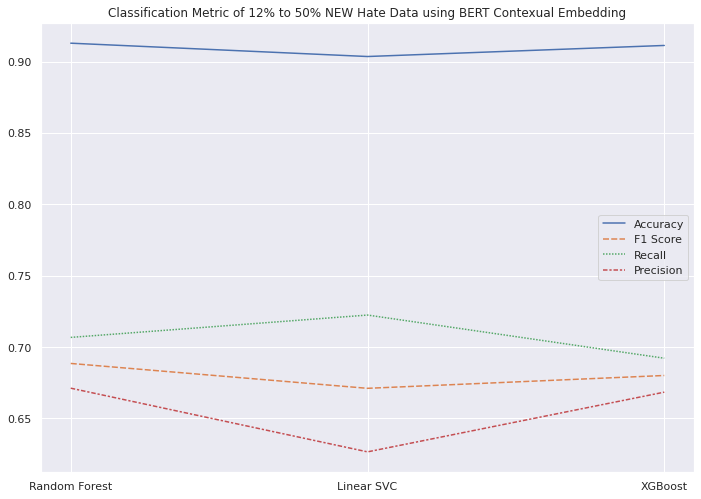

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Classification Metric of 12% to 50% NEW Hate Data using BERT Contexual Embedding")
sns.lineplot(data=output)